# Handling missing data (Python version)
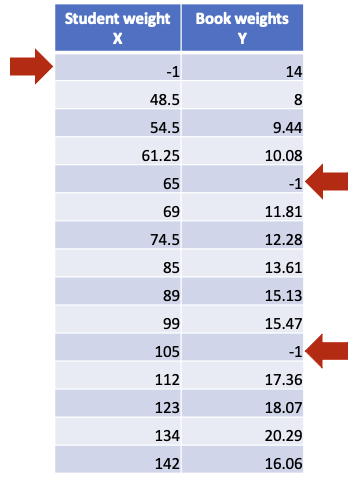
### Is it better to replace missing values with averages or with regression values?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

%matplotlib inline

## Original student and book weights (full dataset)

In [2]:
student_weights = [48.50, 54.50, 61.25, 65.00, 69.00, 74.50, 85.00, 91.23, 89.00, 99.00, 105.00, 112.00, 123.00, 134.00, 142.00]
book_weights    = [ 8.00,  9.44, 10.08, 11.07, 11.81, 12.28, 13.61, 14.00, 15.13, 15.47,  15.53, 17.36,  18.07,  20.29,  16.06 ]

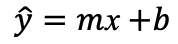

In [3]:
m, b = np.polyfit(student_weights, book_weights, 1)

print(f'{m = }')
print(f'{b = }')

m = 0.11139024135906639
b = 3.8327487497340242


## Calculations from the original full dataset
#### New student weights 72, 108, and 150 which were not in the original full dataset. Use the regression equation of the full dataset to create the baseline estimated book weights for the new student weights.

In [4]:
new_student_a, new_student_b, new_student_c = 72, 108, 150

baseline_est_a, baseline_est_b, baseline_est_c = \
    [m*x + b for x in (new_student_a, new_student_b, new_student_c)]

print(f'{new_student_a = :3d}, {baseline_est_a = :7.4f}')
print(f'{new_student_b = :3d}, {baseline_est_b = :7.4f}')
print(f'{new_student_c = :3d}, {baseline_est_c = :7.4f}')

new_student_a =  72, baseline_est_a = 11.8528
new_student_b = 108, baseline_est_b = 15.8629
new_student_c = 150, baseline_est_c = 20.5413


## Student and book weights with missing values
#### -1 is the placeholder for missing weights.

In [5]:
dirty_student = [48.50, 54.50, 61.25, 65.00, 69.00, 74.50, 85.00,    -1, 89.00, 99.00, 105.00, 112.00, 123.00, 134.00, 142.00]
dirty_books   = [ 8.00,  9.44, 10.08,    -1, 11.81, 12.28, 13.61, 14.00, 15.13, 15.47,     -1, 17.36,  18.07,  20.29,  16.06 ]

## Calculations with only the good data
#### Extract the good X and Y pairs from the dirty student and book weights.

In [6]:
good_X = []
good_Y = []
i = 0

while i < len(dirty_student):
    if (dirty_student[i] > 0) and (dirty_books[i] > 0):
        good_X.append(dirty_student[i])  # only good X values
        good_Y.append(dirty_books[i])    # only good Y values
    i += 1

print(f'{good_X = }')
print(f'{good_Y = }')

good_X = [48.5, 54.5, 61.25, 69.0, 74.5, 85.0, 89.0, 99.0, 112.0, 123.0, 134.0, 142.0]
good_Y = [8.0, 9.44, 10.08, 11.81, 12.28, 13.61, 15.13, 15.47, 17.36, 18.07, 20.29, 16.06]


## Cleanup 1: Replace missing values with averages
#### Compute the averages of the good X and good Y data.

In [7]:
avg_good_X = sum(good_X)/len(good_X)
avg_good_Y = sum(good_Y)/len(good_Y)

print(f'{avg_good_X = }')
print(f'{avg_good_Y = }')

avg_good_X = 90.97916666666667
avg_good_Y = 13.966666666666667


#### Replace each missing student weight with the average of the good X data to produce cleaned `X_1`. Replace each missing book weight with the average of the good Y data to produce cleaned `Y_1`.

In [8]:
X_cleaned_avg = dirty_student.copy()
Y_cleaned_avg = dirty_books.copy()
i = 0

while i < len(dirty_student):
    if X_cleaned_avg[i] < 0: 
        X_cleaned_avg[i] = avg_good_X  # replace a missing X value
        print(f'({dirty_student[i]}, {dirty_books[i]}) => ({X_cleaned_avg[i]}, {Y_cleaned_avg[i]})')
    if Y_cleaned_avg[i] < 0:
        Y_cleaned_avg[i] = avg_good_Y  # replace a missing Y value
        print(f'({dirty_student[i]}, {dirty_books[i]}) => ({X_cleaned_avg[i]}, {Y_cleaned_avg[i]})')
    i += 1

(65.0, -1) => (65.0, 13.966666666666667)
(-1, 14.0) => (90.97916666666667, 14.0)
(105.0, -1) => (105.0, 13.966666666666667)


In [9]:
DataFrame(zip(X_cleaned_avg, Y_cleaned_avg),
          columns=['X cleaned with averages',
                   'Y cleaned with averages'])

X cleaned with averages  Y cleaned with averages
0                 48.500000                 8.000000
1                 54.500000                 9.440000
2                 61.250000                10.080000
3                 65.000000                13.966667
4                 69.000000                11.810000
5                 74.500000                12.280000
6                 85.000000                13.610000
7                 90.979167                14.000000
8                 89.000000                15.130000
9                 99.000000                15.470000
10               105.000000                13.966667
11               112.000000                17.360000
12               123.000000                18.070000
13               134.000000                20.290000
14               142.000000                16.060000

#### Compute regression coefficients `m_cleaned_avg` and `b_cleaned_avg` from the data cleaned with averages.

In [10]:
m_cleaned_avg, b_cleaned_avg = np.polyfit(X_cleaned_avg, Y_cleaned_avg, 1)

print(f'{m_cleaned_avg = }')
print(f'{b_cleaned_avg = }')

m_cleaned_avg = 0.10314994248558672
b_cleaned_avg = 4.666626506206067


#### Make estimated book weights from the regression equation based on `m_cleaned_avg` and `b_cleaned_avg`.

In [11]:
cleaned_avg_est_a, cleaned_avg_est_b, cleaned_avg_est_c = \
    [m_cleaned_avg*student + b_cleaned_avg for student in (new_student_a, new_student_b, new_student_c)]

#### How do these estimates compare to the baseline estimates? Compute relative differences.

In [12]:
rel_diff_a = abs(cleaned_avg_est_a - baseline_est_a)/baseline_est_a
rel_diff_b = abs(cleaned_avg_est_b - baseline_est_b)/baseline_est_b
rel_diff_c = abs(cleaned_avg_est_c - baseline_est_c)/baseline_est_c

avg_diff_cleaned = (rel_diff_a + rel_diff_b + rel_diff_c)/3

df = DataFrame([[new_student_a, cleaned_avg_est_a, baseline_est_a, f'{rel_diff_a:6.3%}'],
               [new_student_b, cleaned_avg_est_b, baseline_est_b, f'{rel_diff_b:6.3%}'],
               [new_student_c, cleaned_avg_est_c, baseline_est_c, f'{rel_diff_c:6.3%}']], 
               columns=['student', 'est. from averages', 
                        'baseline est.', 'rel. diff.'])

display(df)
print()
print(f'Average relative difference: {avg_diff_cleaned:6.3%}')

student  est. from averages  baseline est. rel. diff.
0       72           12.093422      11.852846     2.030%
1      108           15.806820      15.862895     0.353%
2      150           20.139118      20.541285     1.958%


Average relative difference: 1.447%


## Cleanup 2: Replace missing values with regression estimates

#### Compute regression coefficients `good_m` and `good_b` from only the good data.

In [13]:
good_m, good_b = np.polyfit(good_X, good_Y, 1)

print(f'{good_m = }')
print(f'{good_b = }')

good_m = 0.11138097330386121
good_b = 3.8333185329591326


#### Use the regression equation based on `good_m` and `good_b` to compute a replacement value for each missing student and book weight.

In [14]:
X_cleaned_reg = dirty_student.copy()
Y_cleaned_reg = dirty_books.copy()
i = 0

while i < len(dirty_student):
    if X_cleaned_reg[i] < 0: 
        X_cleaned_reg[i] = (Y_cleaned_reg[i] - good_b)/good_m  # replace a missing X value
        print(f'({dirty_student[i]}, {dirty_books[i]}) '
              f'=> ({X_cleaned_reg[i]}, {Y_cleaned_reg[i]})')
    if Y_cleaned_reg[i] < 0:
        Y_cleaned_reg[i] = good_m*X_cleaned_reg[i] + good_b    # replace a missing Y value
        print(f'({dirty_student[i]}, {dirty_books[i]}) '
              f'=> ({X_cleaned_reg[i]}, {Y_cleaned_reg[i]})')
    i += 1

(65.0, -1) => (65.0, 11.073081797710111)
(-1, 14.0) => (91.27843980412067, 14.0)
(105.0, -1) => (105.0, 15.52832072986456)


In [15]:
DataFrame(zip(X_cleaned_reg, Y_cleaned_reg),
          columns=['X cleaned with regression',
                   'Y cleaned with regression'])

X cleaned with regression  Y cleaned with regression
0                    48.50000                   8.000000
1                    54.50000                   9.440000
2                    61.25000                  10.080000
3                    65.00000                  11.073082
4                    69.00000                  11.810000
5                    74.50000                  12.280000
6                    85.00000                  13.610000
7                    91.27844                  14.000000
8                    89.00000                  15.130000
9                    99.00000                  15.470000
10                  105.00000                  15.528321
11                  112.00000                  17.360000
12                  123.00000                  18.070000
13                  134.00000                  20.290000
14                  142.00000                  16.060000

#### Compute regression coefficients `m_cleaned_reg` and `b_cleaned_reg` from the data cleaned with regression estimates.

In [16]:
m_cleaned_reg, b_cleaned_reg = np.polyfit(X_cleaned_reg, Y_cleaned_reg, 1)

print(f'{m_cleaned_reg = }')
print(f'{b_cleaned_reg = }')

m_cleaned_reg = 0.11138097330386126
b_cleaned_reg = 3.833318532959122


#### Make estimated book weights from the regression equation based on `m_cleaned_reg` and `b_cleaned_reg`.

In [17]:
cleaned_reg_est_a, cleaned_reg_est_b, cleaned_reg_est_c = \
    [m_cleaned_reg*student + b_cleaned_reg for student in (new_student_a, new_student_b, new_student_c)]

#### How do these estimates compare to the baseline estimates? Compute relative differences.

In [18]:
rel_diff_a = abs(cleaned_reg_est_a - baseline_est_a)/baseline_est_a
rel_diff_b = abs(cleaned_reg_est_b - baseline_est_b)/baseline_est_b
rel_diff_c = abs(cleaned_reg_est_c - baseline_est_c)/baseline_est_c

avg_diff_cleaned = (rel_diff_a + rel_diff_b + rel_diff_c)/3

df = DataFrame([[new_student_a, cleaned_reg_est_a, baseline_est_a, f'{rel_diff_a:6.3%}'],
               [new_student_b, cleaned_reg_est_b, baseline_est_b, f'{rel_diff_b:6.3%}'],
               [new_student_c, cleaned_reg_est_c, baseline_est_c, f'{rel_diff_c:6.3%}']], 
               columns=['student', 'est. from regression', 
                        'baseline est.', 'rel. diff.'])

display(df)
print()
print(f'Average relative difference: {avg_diff_cleaned:6.3%}')

student  est. from regression  baseline est. rel. diff.
0       72             11.852749      11.852846     0.001%
1      108             15.862464      15.862895     0.003%
2      150             20.540465      20.541285     0.004%


Average relative difference: 0.003%


## Replacing missing values with regression estimates is much better!

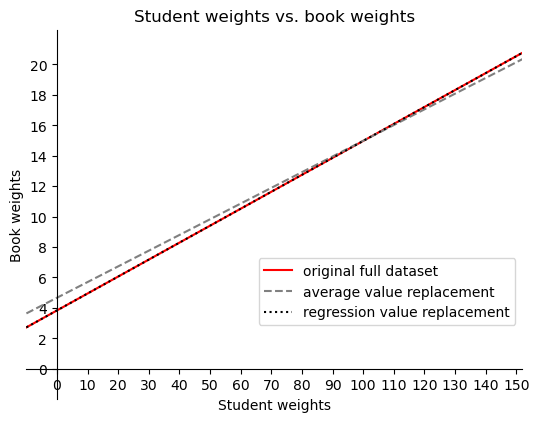

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x_offset = 10
y_offset = 2

# For a regression line, we only need 
# the end points (x1,y1) and (x2,y2)
# End point 1: (min(X), m*min(X) + b)
# End point 2: (max(X), m*max(X) + b)

# Adjust the left end of the regression line
# to make it cross the Y axis.
max_x = max(student_weights)
max_y = max(book_weights)
x1 = -x_offset
x2 = max_x + x_offset

# Full dataset regression line using m and b: red.
y1 = m*x1 + b
y2 = m*x2 + b
plt.plot([x1, x2], [y1, y2], color='red',
         label='original full dataset')

# Regression line using m_cleaned_avg and b_cleaned_avg: gray.
y1 = m_cleaned_avg*x1 + b_cleaned_avg
y2 = m_cleaned_avg*x2 + b_cleaned_avg
plt.plot([x1, x2], [y1, y2], color='gray', linestyle='--', 
         label='average value replacement')

# Regression line using m_cleaned_reg and b_cleaned_reg: blue.
y1 = m_cleaned_reg*x1 + b
y2 = m_cleaned_reg*x2 + b
plt.plot([x1, x2], [y1, y2], color='black', linestyle=':',
         label='regression value replacement')

# Set the limits of the x-axis and the y-axis.
ax.set_xlim([x1, x2])
ax.set_ylim([-y_offset, max_y + y_offset])
    
# Set the ticks of the x-axis and the y-axis.
plt.xticks(range(0, int(max_x + x_offset), x_offset))
plt.yticks(range(0, int(max_y + y_offset), y_offset))

# Position the x-axis and the y-axis to the origin.
ax.spines.left.set_position('zero')
ax.spines.bottom.set_position('zero')

# Remove the top and right spines.
ax.spines.top.set_color('none')
ax.spines.right.set_color('none')

# Title and axis labels.
ax.set_title('Student weights vs. book weights')
ax.set_xlabel('Student weights')
ax.set_ylabel('Book weights')

# Display the graph.
print()
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.4))
plt.show()
